In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
bert_d_1 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/hansen_d_bert_ds6_fold1_results.csv')
bert_d_2 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/hansen_d_bert_ds5_fold2_results.csv')
bert_d_3 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/hansen_d_bert_ds4_fold3_results.csv')
bert_d_4 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/hansen_d_bert_ds3_fold4_results.csv')
bert_d_5 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/hansen_d_bert_ds2_fold5_results.csv')
bert_d_6 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/hansen_d_bert_ds1_fold6_results.csv')
bert = pd.concat((bert_d_1, bert_d_2, bert_d_3, bert_d_4, bert_d_5, bert_d_6), axis=0)

In [3]:
bert_d_4["index"] = bert_d_4["smiles"].str.find('CCCCCCCCCCCCCCCCCC(=O)OCCCC')

In [4]:
bert_d_4.loc[lambda bert_d_4: bert_d_4["index"] == 0]

,Unnamed: 0,smiles,actual,predict,index


In [5]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(bert['actual'], bert['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(bert['actual'], bert['predict'])))

# R^2 Coefficient of Determination
print(r2_score(bert['actual'], bert['predict']))

0.5925965359256128
0.8270229998739433
0.7876917575119637


In [6]:
len(bert)

1183

In [7]:
bert['residual']= bert['predict']-bert['actual']

In [8]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((bert['residual']**2).sum()/(len(bert)-2))
sdr

0.8277229771468366

In [9]:
bert['std_residual'] = bert['residual']/sdr
bert['std_residual']

0     -0.265454
1      0.900049
2      0.635538
3      0.057667
4      0.855847
         ...   
193    0.069884
194    1.254714
195   -0.117255
196    0.641036
197    0.193373
Name: std_residual, Length: 1183, dtype: float64

In [10]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
bert_outliers = bert.loc[abs(bert['std_residual']) > n]
bert_outliers

,Unnamed: 0,smiles,actual,predict,residual,std_residual
21,21,BrC(Br)C(Br)Br,21.0,18.202576,-2.797424,-3.379662
104,104,CC(CCl)OC(C)CCl,19.0,16.174423,-2.825577,-3.413675
175,175,C#N,12.3,15.372493,3.072493,3.711982
33,33,[SiH3]C(Cl)(Cl)Cl,16.5,19.288527,2.788527,3.368913
65,65,Cl[SiH](Cl)Cl,14.2,17.736053,3.536053,4.272025
99,99,FC(F)=C(F)C(F)=C(F)F,13.8,16.444427,2.644427,3.194821
10,10,OC(F)(C(F)F)C(F)(F)F,17.2,13.640128,-3.559872,-4.300801
164,164,O[N+]([O-])=O,13.5,16.282795,2.782795,3.361988
171,171,SS,17.3,19.979610,2.679610,3.237327
51,51,[O-][O+]=O,19.8,16.645884,-3.154116,-3.810594


In [11]:
# Set the default text font size
plt.rc('font', size=22)

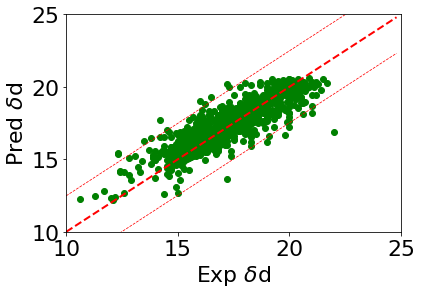

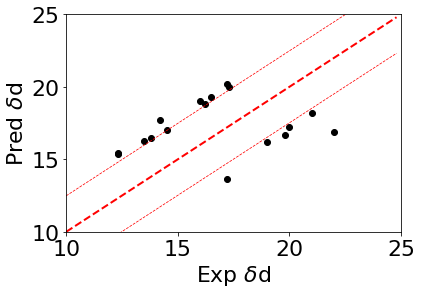

In [12]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['actual'], y=bert['predict'], color='green')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers['actual'], y=bert_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

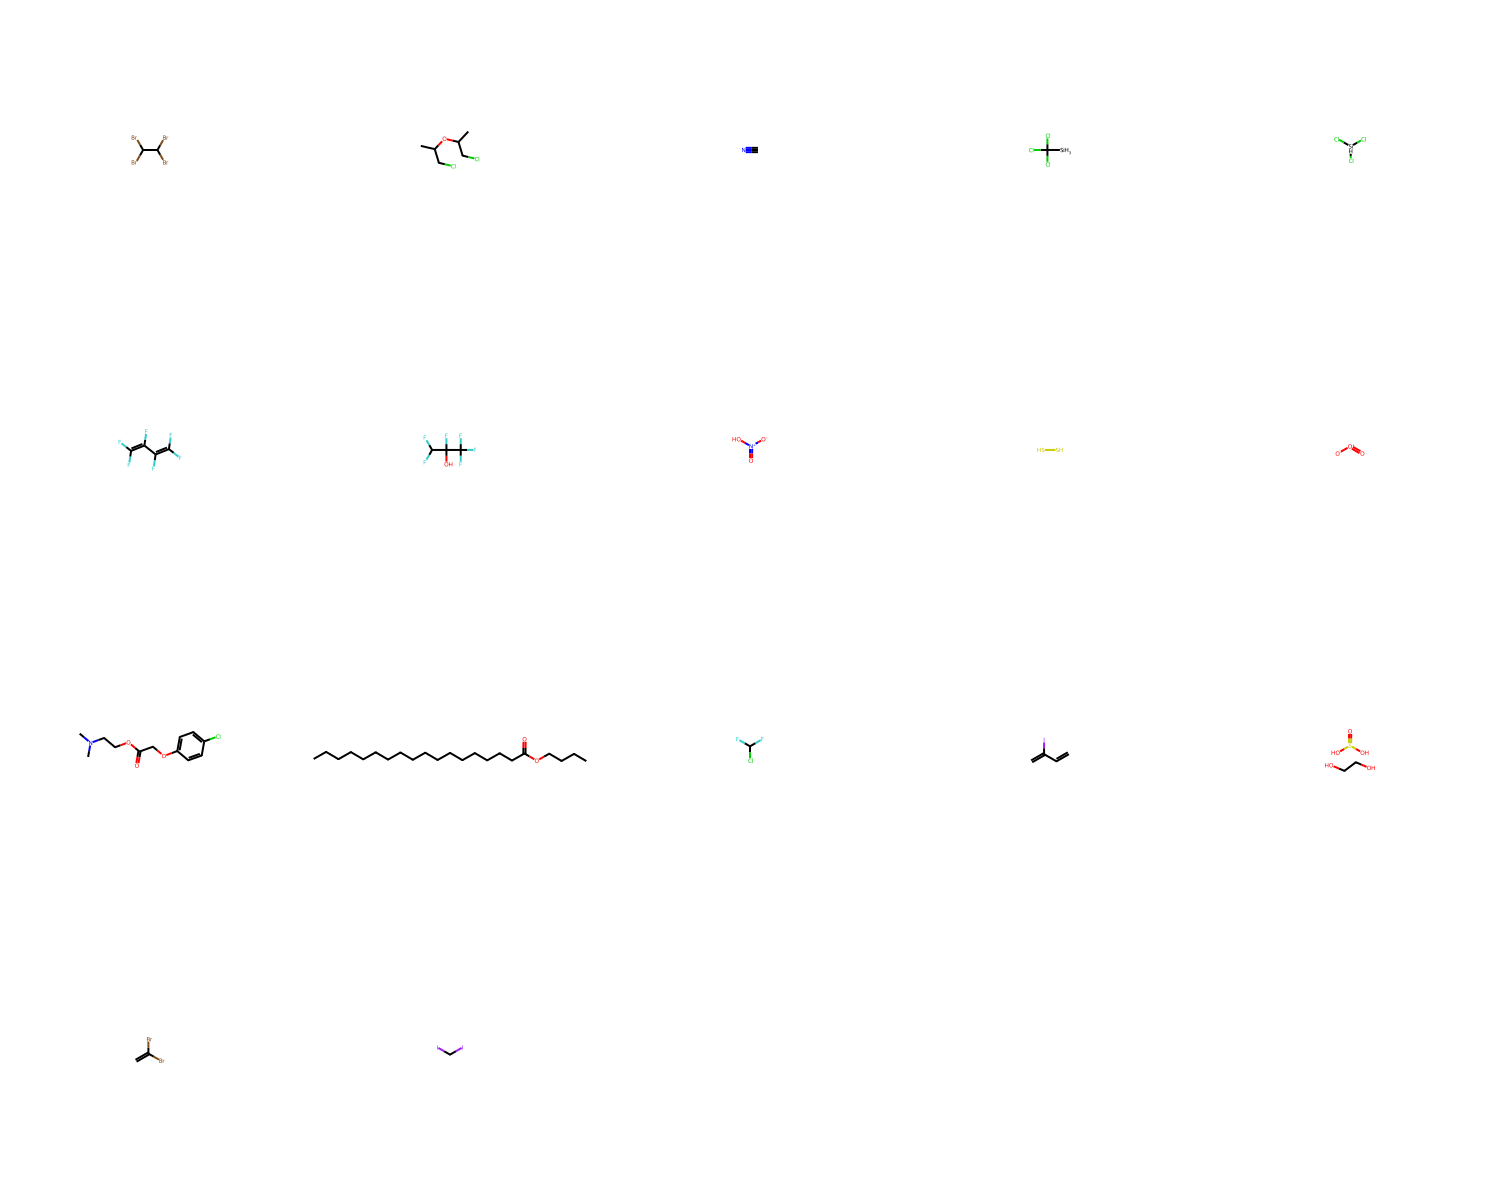

In [13]:
outliners = [Chem.MolFromSmiles(x) for x in bert_outliers['smiles']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [14]:
bert_outliers.to_csv('bert_d_outliers3.csv')

In [15]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
bert_outliers2 = bert.loc[abs(bert['std_residual']) > n]
bert_outliers2

,Unnamed: 0,smiles,actual,predict,residual,std_residual
5,5,COC(=O)C(Cl)=C,15.9,17.674994,1.774994,2.144430
13,13,CC1COC(=O)O1,20.0,17.654255,-2.345745,-2.833974
21,21,BrC(Br)C(Br)Br,21.0,18.202576,-2.797424,-3.379662
78,78,OC=O,14.6,16.869920,2.269920,2.742367
90,90,[SiH3]C=C,15.5,17.706339,2.206339,2.665552
...,...,...,...,...,...,...
106,106,O=C(C#N)C#N,15.0,16.688814,1.688814,2.040313
107,107,C1CCCCCCCCCCC1,16.4,18.078403,1.678403,2.027735
111,111,C=CN1CCCC1=O,16.4,18.337233,1.937233,2.340436
120,120,BrC(Br)=C,16.2,18.811256,2.611256,3.154746


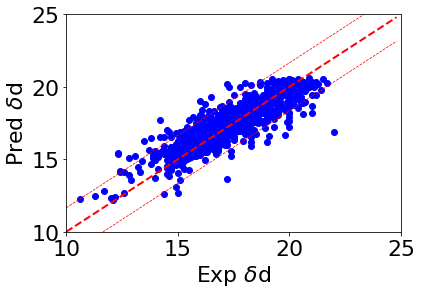

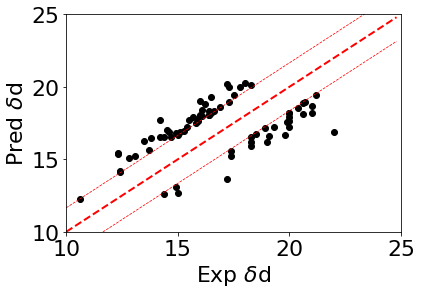

In [16]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['actual'], y=bert['predict'], color='blue')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers2['actual'], y=bert_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

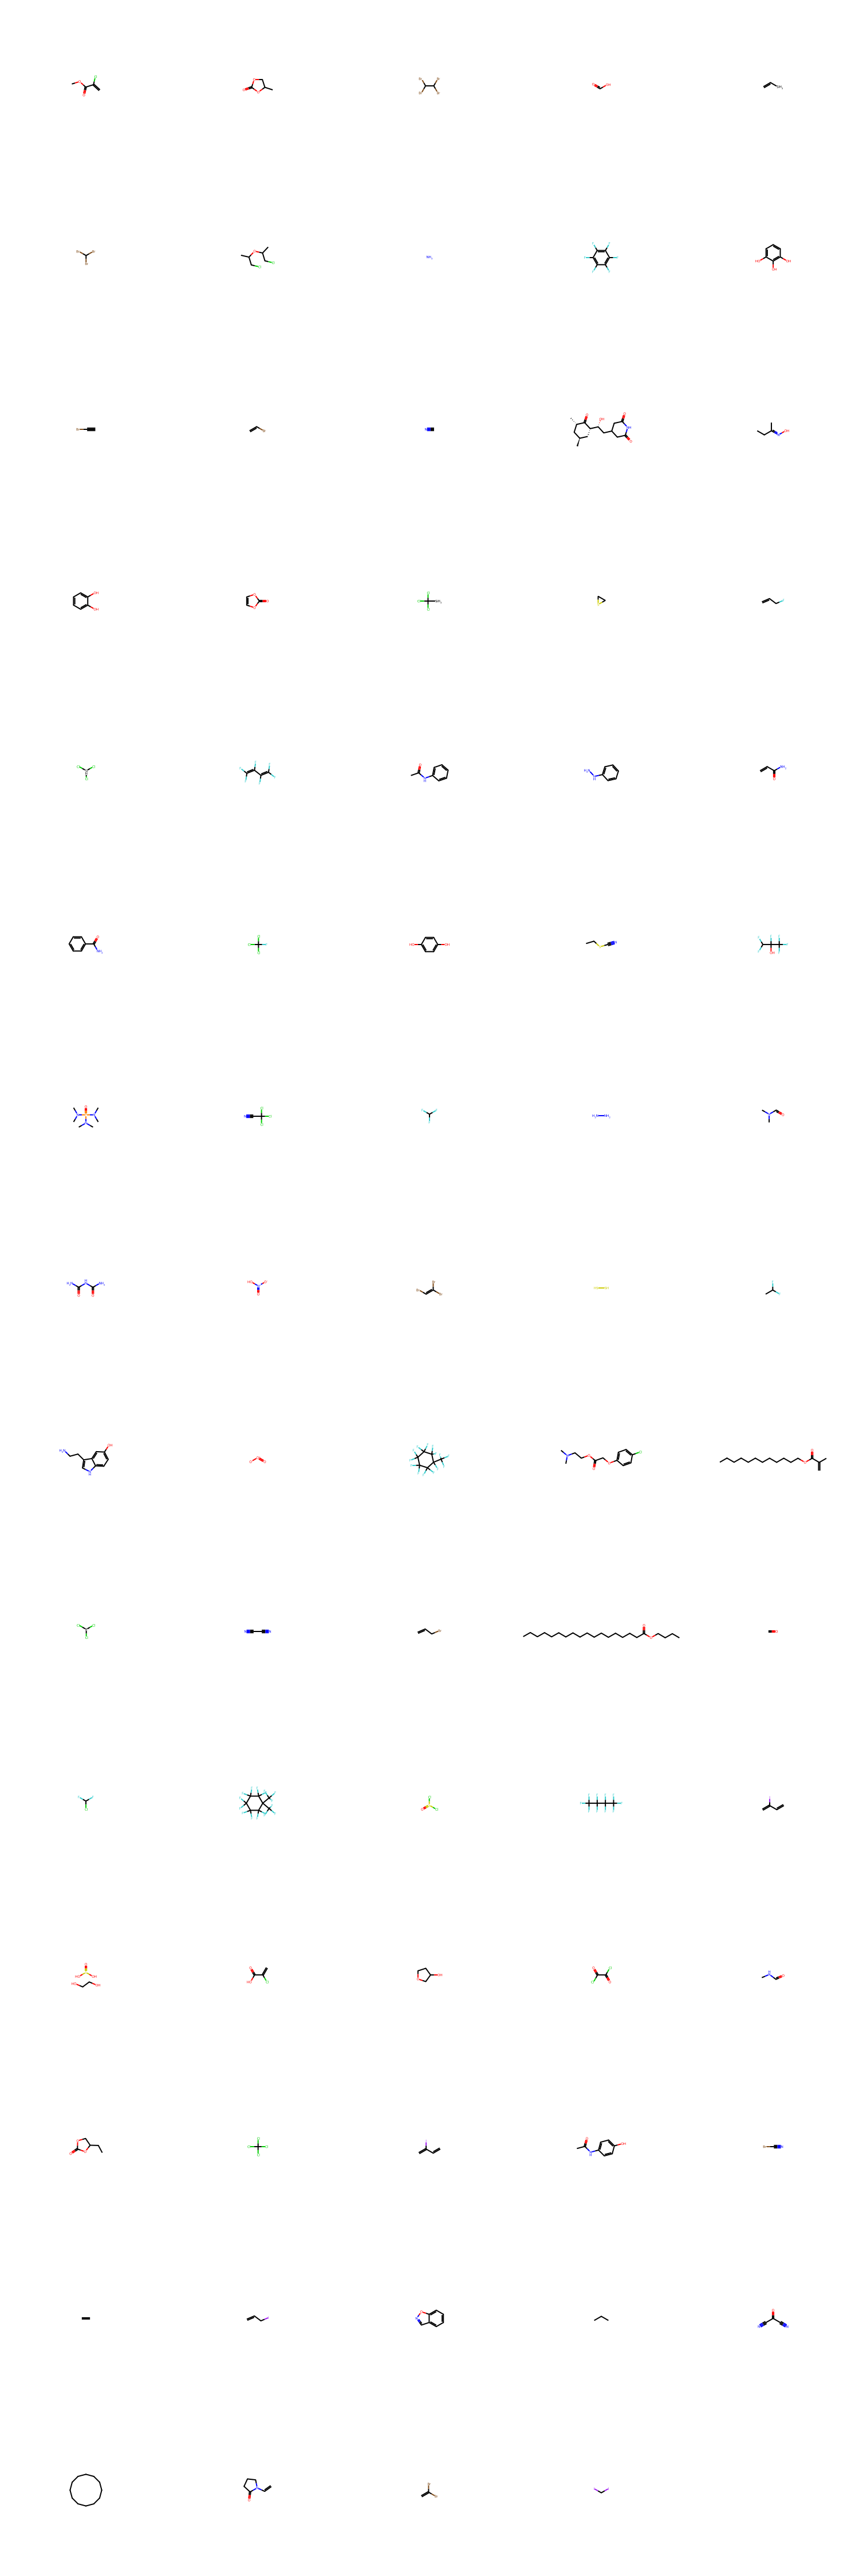

In [15]:
outliners2 = [Chem.MolFromSmiles(x) for x in bert_outliers2['smiles']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [16]:
bert_outliers2.to_csv('bert_d_outliers2.csv')

In [17]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in bert_outliers2['smiles']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
134.28228998935134


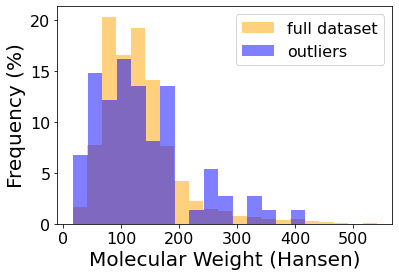

In [18]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()